In [1]:
%load_ext lab_black

# Generate data with a toy poisson rate function

import numpy as np
import pandas as pd
from functools import partial

from scipy.integrate import quad

x_min = 0
x_max = 10


def rate_density(x, a):
    """simple linear rate density
    """
    return a * x


def n_expected(a):
    return 0.5 * a * (x_max ** 2 - x_min ** 2)  # integral(rate_density, x_min, x_max)


def generate_data(a):
    # Generate total number
    n = np.random.poisson(n_expected(a))

    # Generate x values according to rate density (normalized as PDF)
    u = np.random.random(n)

    # From inverting CDF of above normalized density
    x = np.sqrt(u * (x_max ** 2 - x_min ** 2) + x_min ** 2)
    return x

(array([ 5.,  7.,  7., 11., 15., 13., 12., 15., 23., 31.]),
 array([0.98172489, 1.87680195, 2.77187901, 3.66695607, 4.56203313,
        5.45711019, 6.35218725, 7.24726431, 8.14234137, 9.03741843,
        9.93249549]),
 <a list of 10 Patch objects>)

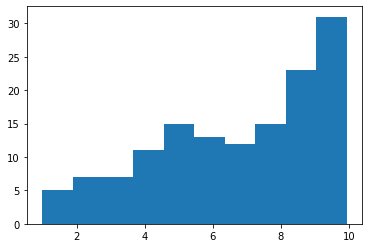

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

a_true = 3
observations = generate_data(a_true)
plt.hist(observations)

In [3]:
from solike.poisson_data import PoissonData

N = 100
a_maxlikes = []
for i in range(N):
    observations = generate_data(a_true)
    catalog = pd.DataFrame({"x": observations})

    data = PoissonData("toy", catalog, ["x"])

    a_grid = np.arange(0.1, 10, 0.1)

    lnl = [data.loglike(partial(rate_density, a=a), n_expected(a)) for a in a_grid]
    a_maxlike = a_grid[np.argmax(lnl)]

    a_maxlikes.append(a_maxlike)

np.mean(a_maxlikes)

3.0120000000000005

In [7]:
plt.plot(a_grid, lnl)
plt.axvline(a_true, color="r")

NameError: name 'lnl' is not defined

In [30]:
a_maxlike = a_grid[np.argmax(lnl)]
a_maxlike

2.9000000000000004

In [18]:
from inspect import signature

sig = signature(partial(rate_density, a=3))

In [20]:
sig.parameters

mappingproxy({'x': <Parameter "x">, 'a': <Parameter "a=3">})

In [10]:
def other_rate_density(x):
    return 2 * a * x


data.loglike(other_rate_density, 2 * n_expected)

256.5984406948778

In [8]:
def another_rate_density(x):
    return 1 / 2 * a * x


data.loglike(another_rate_density, 0.5 * n_expected)

272.26799216577393

In [2]:
x = np.random.random(10)

In [3]:
x.shape

(10,)

In [4]:
x.ndim

1

In [11]:
from inspect import signature

def myfunc(a, b, c=3):
    return a + b

sig = signature(myfunc)

In [12]:
sig.parameters

mappingproxy({'a': <Parameter "a">,
              'b': <Parameter "b">,
              'c': <Parameter "c=3">})

In [26]:
par.name

'a'

In [13]:
len([p for p in sig.parameters if )

3

In [24]:
par = sig.parameters['a']

<Parameter "a">